In [1]:
import numpy as np

# parameter(have to set by yourself)
grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# start, finish 위치 랜덤 생성 + 블럭위치에는 생성 안되게 + start, finish가 같지 않게
start = None
finish = None

while start is None or grid[start] == -1 or finish is None or grid[finish] == -1 or finish == start:
    start = (np.random.randint(9), np.random.randint(7))
    finish = (np.random.randint(9), np.random.randint(7))

dx = [0, 1, 0, -1]
dy = [1, 0, -1, 0]

to_right = (0,1)


def blue(current, finish, grid, path):
    candidate = []

    current = (current[0], current[1]-1)
    candidate.append(current)

    return candidate



def purple(current, finish, grid, path):
    temp_candidate = []
    distances = []

    # start가 purple grid에 있을 때, 일단 모든 candidate 고려
    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0]) + abs(ny - finish[1]))

    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



def green(current, finish, grid, path):
    temp_candidate = []
    distances = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        # 그리드 범위 안에 있고, Block이 아니고, 이미 간 길이 아닌 경우만
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                temp_candidate.append((nx, ny))
                distances.append(abs(nx - finish[0])+abs(ny - finish[1]))
                
    # finish와 거리가 가장 가까운 candidate만 남기기 다시말해, finish와 가까운 좌표만 남김
    if len(temp_candidate) == 0:
        candidate = []
    else:
        min_distance = min(distances)
        candidate = [c for i, c in enumerate(temp_candidate) if distances[i] == min_distance]

    return candidate



# 무조건 갈래길 다 candidate
def orange(current, finish, grid, path):
    candidate = []

    for i in range(4):
        nx = current[0] + dx[i]
        ny = current[1] + dy[i]
        if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] != -1 and (nx, ny) not in path:
            # 역주행으로 blue로 가는 경우 제외
            if not ((nx - current[0], ny - current[1]) == to_right and grid[nx, ny]) == 1:
                candidate.append((nx, ny))
    
    return candidate




# 1. 밟았던건 안밟게. path 리스트 활용
# 2. 추후 if current == 왼쪽 가장자리 쪽 or 교차로 등이면 소요시간 변화 등 속성
# 3. 
def move(current, finish, grid, path, route):
    print('current : ', current)

    path.append(current)
    print('path : ', path)

    color = grid[current[0], current[1]]
    print('color : ', color)
    if color == 1:
        candidate = blue(current, finish, grid, path)
    elif color == 2:
        candidate = purple(current, finish, grid, path)
    elif color == 3:
        candidate = green(current, finish, grid, path)
    elif color == 4:
        candidate = orange(current, finish, grid, path)
    else:
        print('Invalid color. terminating.')
        return
    print('candidate : ', candidate)

    # 갈곳 없으면 종료
    if len(candidate) == 0 :
        print('This path is dead end.', 'path : ', path)
        return

    # candidate 방문
    for next_move in candidate:
        if next_move == finish:
            # If next_move is finish, add completed path to route
            print('got finish, completed path : ', path + [next_move]) 
            route.append(path + [next_move])
        else:
            # Continue recursively visiting candidate
            new_path = path.copy()
            move(next_move, finish, grid, new_path, route)

    return

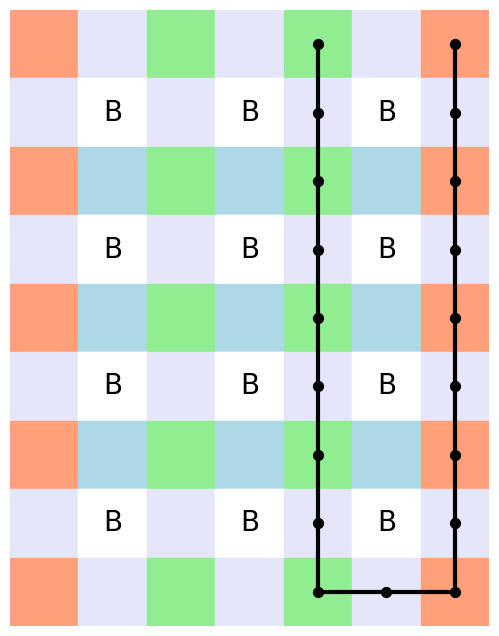

In [2]:
import matplotlib.pyplot as plt

grid = np.array([
    [4, 2, 3, 2, 3, 2, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 1, 3, 1, 3, 1, 4],
    [2, -1, 2, -1, 2, -1, 2],
    [4, 2, 3, 2, 3, 2, 4],
])

# Define the colors for each value
colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

# Define the path
path = [(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (7, 4), (6, 4), (5, 4), (4, 
4), (3, 4), (2, 4), (1, 4), (0, 4)]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(8, 8))

# Iterate through the grid and plot each cell with the appropriate color
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))  # flip the order of the coordinates
        
        # Add text 'B' on a white background if the coordinate value is -1
        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)
    
    # Add black dots at each coordinate in the path
    for coord in path:
        if coord[0] == i:
            ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)  # flip the order of the coordinates
    
# Connect the dots in the path with a line
x, y = zip(*path)
ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')  # flip the order of the coordinates

# Set the limits and aspect ratio
ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the plot
plt.show()


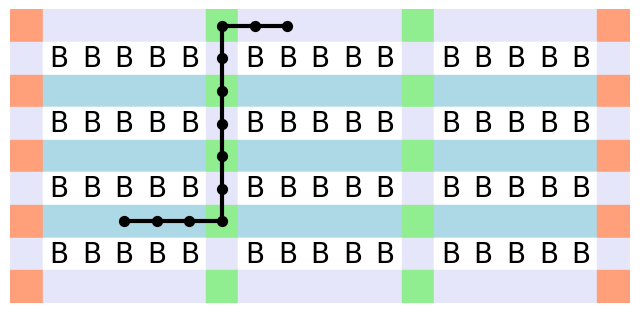

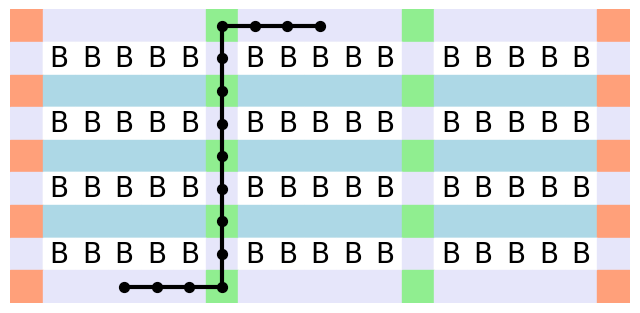

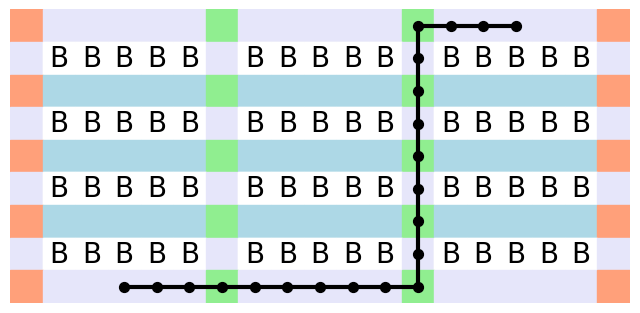

In [3]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2 ,3, 2, 2, 2, 2, 2, 4]])

colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

route = [[(0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)],
         [(0, 9), (0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (8, 6), (8, 5), (8, 4), (8, 3)],
         [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (1, 12), (0, 12), (0, 13), (0, 14), (0, 15)]]

for path in route:
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i][j]
            color = colors.get(value, 'white')
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

            if value == -1:
                ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
                ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

        for coord in path:
            if coord[0] == i:
                ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)

    x, y = zip(*path)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    plt.show()


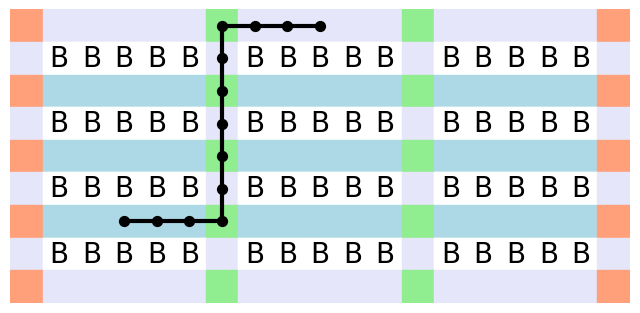

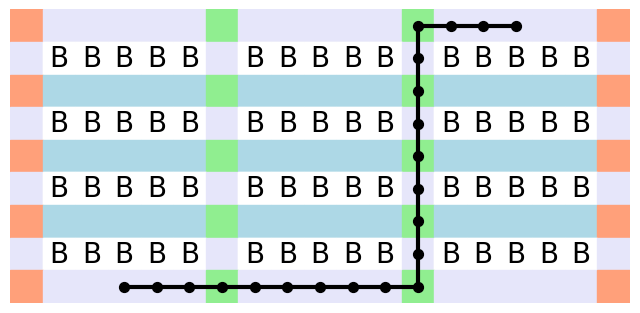

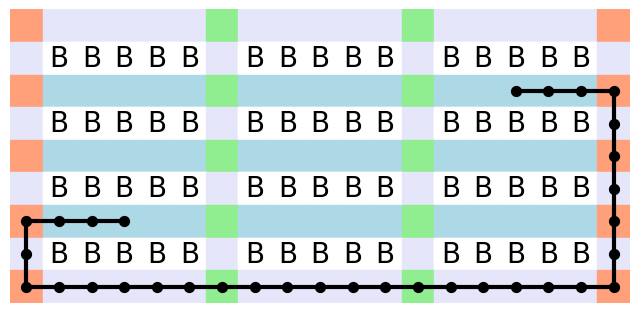

In [4]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4],
        [2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2, -1, -1, -1, -1, -1, 2],
        [4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2 ,3, 2, 2, 2, 2, 2, 4]])

colors = {
    1: 'lightblue',
    2: 'lavender',
    3: 'lightgreen',
    4: 'lightsalmon'
}

route = [[(0, 9), (0, 8), (0, 7), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (6, 3)],
         [(8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (7, 12), (6, 12), (5, 12), (4, 12), (3, 12), (2, 12), (1, 12), (0, 12), (0, 13), (0, 14), (0, 15)],
         [(6, 3), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (8, 15), (8, 16), (8, 17), (8, 18), (7, 18), (6, 18), (5, 18), (4, 18), (3, 18), (2, 18), (2, 17), (2, 16), (2, 15)]]

for path in route:
    fig, ax = plt.subplots(figsize=(8, 8))

    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            value = grid[i][j]
            color = colors.get(value, 'white')
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

            if value == -1:
                ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
                ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

        for coord in path:
            if coord[0] == i:
                ax.scatter(coord[1]+0.5, grid.shape[0]-1-i+0.5, color='black', s=50)

    x, y = zip(*path)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color='black')

    ax.set_xlim(0, grid.shape[1])
    ax.set_ylim(0, grid.shape[0])
    ax.set_aspect('equal')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.axis('off')

    plt.show()


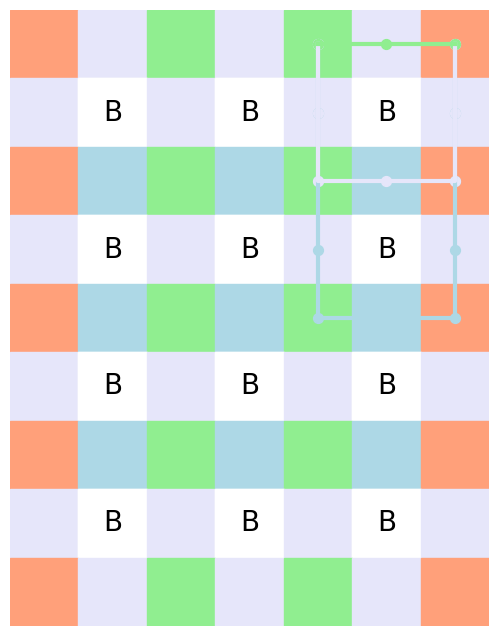

In [5]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=3, color=list(colors.values())[idx])

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=50)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()


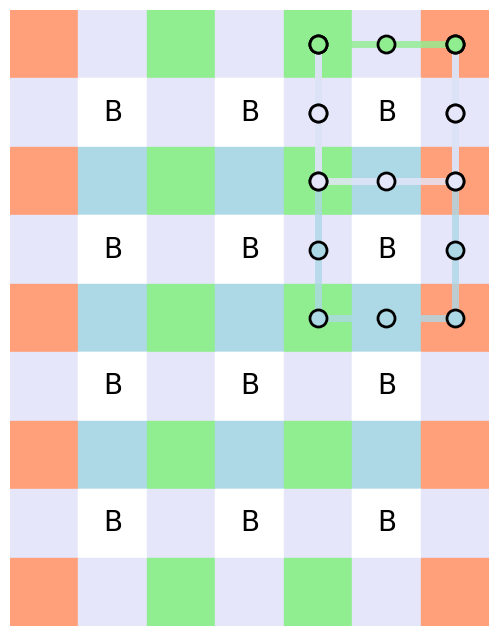

In [6]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.array([[4, 2, 3, 2, 3, 2, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 1, 3, 1, 3, 1, 4],
                 [2, -1, 2, -1, 2, -1, 2],
                 [4, 2, 3, 2, 3, 2, 4]])

colors = {1: 'lightblue',
          2: 'lavender',
          3: 'lightgreen',
          4: 'lightsalmon'}

routes = [[(0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (4, 5), (4, 4), (3, 4), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (1, 6), (2, 6), (2, 5), (2, 4), (1, 4), (0, 4)],
          [(0, 6), (0, 5), (0, 4)]]

fig, ax = plt.subplots(figsize=(8, 8))

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        value = grid[i][j]
        color = colors.get(value, 'white')
        ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color=color))

        if value == -1:
            ax.add_patch(plt.Rectangle((j, grid.shape[0]-1-i), 1, 1, color='white'))
            ax.text(j+0.5, grid.shape[0]-1-i+0.5, 'B', ha='center', va='center', color='black', fontsize=20)

for idx, route in enumerate(routes):
    x, y = zip(*route)
    ax.plot([y_i+0.5 for y_i in y], [grid.shape[0]-1-x_i+0.5 for x_i in x], linewidth=5, color=list(colors.values())[idx], alpha=0.8, zorder=2)

    for coord in route:
        ax.scatter(coord[1]+0.5, grid.shape[0]-1-coord[0]+0.5, color=list(colors.values())[idx], s=150, edgecolors='black', linewidths=2, zorder=3)

ax.set_xlim(0, grid.shape[1])
ax.set_ylim(0, grid.shape[0])
ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

plt.show()


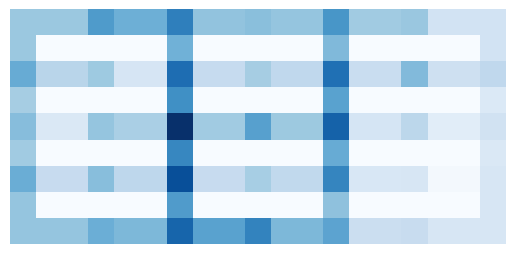

In [7]:
# import numpy as np
# import matplotlib.pyplot as plt

# # a1 : 0.333 a2 : 0.333 a3 : 0.333
# now_count = np.array([[441, 441, 441, 646, 541, 541, 736, 446, 446, 467, 437, 437, 624, 358,
#                        358, 389, 190, 190, 190],
#                       [441, 0, 0, 0, 0, 0, 485, 0, 0, 0, 0, 0, 453, 0, 0, 0, 0, 0, 190],
#                       [593, 332, 332, 418, 203, 203, 813, 300, 300, 406, 320, 320,
#                        776, 249, 249, 469, 219, 219, 288],
#                       [413, 0, 0, 0, 0, 0, 638, 0, 0, 0, 0, 0, 530, 0, 0, 0, 0, 0, 167],
#                       [513, 183, 183, 443, 383, 383, 987, 332, 332, 534, 343, 343,
#                        780, 188, 188, 303, 122, 122, 238],
#                       [430, 0, 0, 0, 0, 0, 621, 0, 0, 0, 0, 0, 499, 0, 0, 0, 0, 0, 187],
#                       [539, 236, 236, 425, 266, 266, 857, 251, 251, 358, 273, 273,
#                        666, 151, 151, 157, 14, 14, 199],
#                       [412, 0, 0, 0, 0, 0, 576, 0, 0, 0, 0, 0, 409, 0, 0, 0, 0, 0, 197],
#                       [412, 412, 412, 512, 457, 457, 792, 551, 551, 682, 448, 448,
#                        555, 253, 253, 275, 197, 197, 197]])

# plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
# plt.show()





import numpy as np
import matplotlib.pyplot as plt

# a_1 : 0, a_2 : 0, a_3 : 1
now_count = np.array([[397, 397, 397, 612, 517, 517, 724, 423, 423, 444, 414, 414,
                       633, 383, 383, 404, 195, 195, 195],
                      [397, 0, 0, 0, 0, 0, 508, 0, 0, 0, 0, 0, 469, 0, 0, 0, 0, 0, 195],
                      [533, 303, 303, 389, 174, 174, 800, 259, 259, 365, 279, 279,
                       786, 244, 244, 464, 214, 214, 278],
                      [366, 0, 0, 0, 0, 0, 659, 0, 0, 0, 0, 0, 580, 0, 0, 0, 0, 0, 147],
                      [452, 155, 155, 415, 355, 355, 1046, 383, 383, 585, 394, 394,
                       843, 177, 177, 292, 111, 111, 203],
                      [383, 0, 0, 0, 0, 0, 695, 0, 0, 0, 0, 0, 535, 0, 0, 0, 0, 0, 148],
                      [527, 257, 257, 446, 287, 287, 921, 254, 254, 361, 276, 276,
                       702, 161, 161, 167, 24, 24, 169],
                      [414, 0, 0, 0, 0, 0, 606, 0, 0, 0, 0, 0, 432, 0, 0, 0, 0, 0, 166],
                      [414, 414, 414, 522, 475, 475, 830, 579, 579, 710, 476, 476,
                       571, 234, 234, 250, 166, 166, 166]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
plt.axis('off')  # x 및 y 축의 숫자값 표시 비활성화
plt.show()



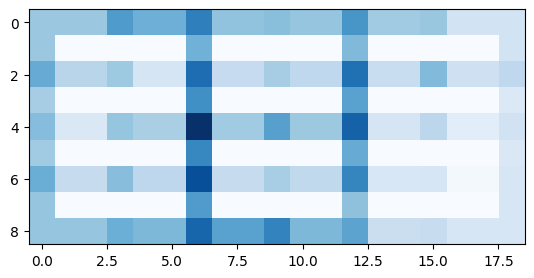

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# a_1 : 0, a_2 : 0, a_3 : 1
now_count = np.array([[397, 397, 397, 612, 517, 517, 724, 423, 423, 444, 414, 414,
                       633, 383, 383, 404, 195, 195, 195],
                      [397, 0, 0, 0, 0, 0, 508, 0, 0, 0, 0, 0, 469, 0, 0, 0, 0, 0, 195],
                      [533, 303, 303, 389, 174, 174, 800, 259, 259, 365, 279, 279,
                       786, 244, 244, 464, 214, 214, 278],
                      [366, 0, 0, 0, 0, 0, 659, 0, 0, 0, 0, 0, 580, 0, 0, 0, 0, 0, 147],
                      [452, 155, 155, 415, 355, 355, 1046, 383, 383, 585, 394, 394,
                       843, 177, 177, 292, 111, 111, 203],
                      [383, 0, 0, 0, 0, 0, 695, 0, 0, 0, 0, 0, 535, 0, 0, 0, 0, 0, 148],
                      [527, 257, 257, 446, 287, 287, 921, 254, 254, 361, 276, 276,
                       702, 161, 161, 167, 24, 24, 169],
                      [414, 0, 0, 0, 0, 0, 606, 0, 0, 0, 0, 0, 432, 0, 0, 0, 0, 0, 166],
                      [414, 414, 414, 522, 475, 475, 830, 579, 579, 710, 476, 476,
                       571, 234, 234, 250, 166, 166, 166]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()


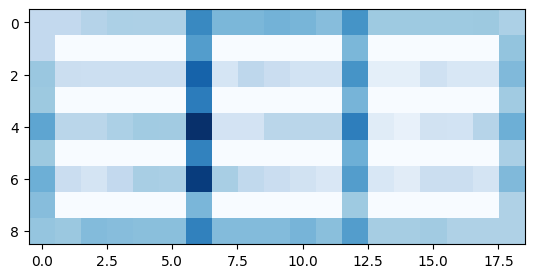

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# a1:0, a2:0, a3:1, 위치 랜덤
now_count = [
    [269., 269., 310., 341., 334., 334., 675., 470., 470., 492., 479., 445., 633., 385., 385., 385., 385., 389., 339.],
    [269., 0., 0., 0., 0., 0., 588., 0., 0., 0., 0., 0., 472., 0., 0., 0., 0., 0., 412.],
    [395., 226., 223., 223., 223., 223., 824., 174., 283., 236., 192., 192., 628., 95., 95., 207., 160., 160., 461.],
    [388., 0., 0., 0., 0., 0., 724., 0., 0., 0., 0., 0., 485., 0., 0., 0., 0., 0., 377.],
    [553., 294., 296., 338., 376., 373., 1028., 186., 186., 297., 294., 294., 717., 119., 78., 193., 190., 307., 506.],
    [388., 0., 0., 0., 0., 0., 700., 0., 0., 0., 0., 0., 508., 0., 0., 0., 0., 0., 347.],
    [507., 233., 181., 267., 351., 348., 979., 353., 273., 234., 197., 155., 588., 159., 114., 227., 227., 184., 461.],
    [445., 0., 0., 0., 0., 0., 474., 0., 0., 0., 0., 0., 383., 0., 0., 0., 0., 0., 333.],
    [406., 391., 450., 444., 437., 437., 706., 451., 451., 451., 484., 436., 589., 359., 359., 373., 333., 333., 333.]
]
plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()


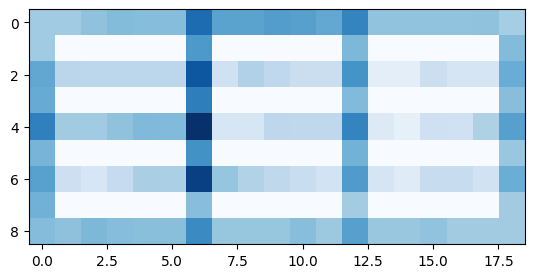

In [10]:
import numpy as np
import matplotlib.pyplot as plt

now_count = [
    [346., 346., 387., 418., 411., 411., 729., 523., 523., 545., 532., 498., 641., 384., 384., 384., 384., 388., 338.],
    [346., 0., 0., 0., 0., 0., 562., 0., 0., 0., 0., 0., 433., 0., 0., 0., 0., 0., 417.],
    [503., 268., 265., 265., 265., 265., 809., 193., 302., 255., 211., 211., 584., 95., 95., 207., 160., 160., 482.],
    [485., 0., 0., 0., 0., 0., 663., 0., 0., 0., 0., 0., 420., 0., 0., 0., 0., 0., 408.],
    [657., 344., 346., 388., 426., 423., 951., 152., 152., 263., 260., 260., 642., 120., 79., 194., 191., 308., 534.],
    [449., 0., 0., 0., 0., 0., 591., 0., 0., 0., 0., 0., 456., 0., 0., 0., 0., 0., 371.],
    [531., 203., 151., 237., 321., 318., 888., 376., 296., 257., 220., 178., 551., 157., 112., 225., 225., 182., 478.],
    [460., 0., 0., 0., 0., 0., 408., 0., 0., 0., 0., 0., 340., 0., 0., 0., 0., 0., 345.],
    [413., 392., 433., 409., 402., 402., 617., 374., 374., 374., 407., 359., 534., 369., 369., 384., 345., 345., 345.]
]
plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()

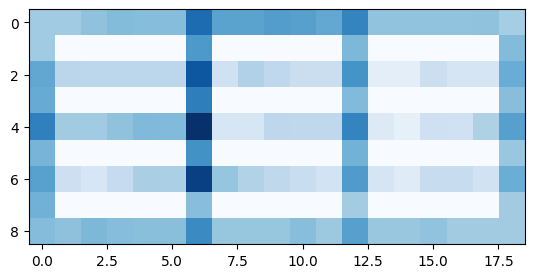

In [11]:
import numpy as np
import matplotlib.pyplot as plt

now_count = np.array([
    [346., 346., 387., 418., 411., 411., 729., 523., 523., 545., 532., 498., 641., 384., 384., 384., 384., 388., 338.],
    [346., 0., 0., 0., 0., 0., 562., 0., 0., 0., 0., 0., 433., 0., 0., 0., 0., 0., 417.],
    [503., 268., 265., 265., 265., 265., 809., 193., 302., 255., 211., 211., 584., 95., 95., 207., 160., 160., 482.],
    [485., 0., 0., 0., 0., 0., 663., 0., 0., 0., 0., 0., 420., 0., 0., 0., 0., 0., 408.],
    [657., 344., 346., 388., 426., 423., 951., 152., 152., 263., 260., 260., 642., 120., 79., 194., 191., 308., 534.],
    [449., 0., 0., 0., 0., 0., 591., 0., 0., 0., 0., 0., 456., 0., 0., 0., 0., 0., 371.],
    [531., 203., 151., 237., 321., 318., 888., 376., 296., 257., 220., 178., 551., 157., 112., 225., 225., 182., 478.],
    [460., 0., 0., 0., 0., 0., 408., 0., 0., 0., 0., 0., 340., 0., 0., 0., 0., 0., 345.],
    [413., 392., 433., 409., 402., 402., 617., 374., 374., 374., 407., 359., 534., 369., 369., 384., 345., 345., 345.]
])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()


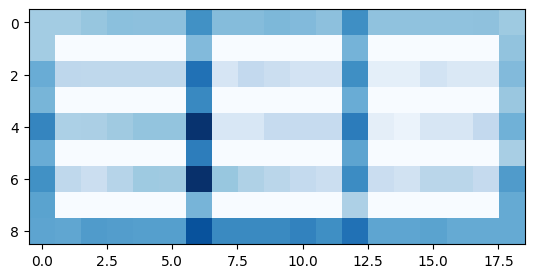

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 0 1 0 
now_count = np.array([
    [413., 413., 455., 488., 482., 482., 728., 505., 505., 528., 517., 484., 735., 475., 475., 475., 475., 480., 431.],
    [413., 0., 0., 0., 0., 0., 517., 0., 0., 0., 0., 0., 551., 0., 0., 0., 0., 0., 471.],
    [588., 318., 315., 315., 315., 315., 868., 194., 303., 256., 212., 212., 735., 105., 105., 217., 170., 170., 513.],
    [544., 0., 0., 0., 0., 0., 765., 0., 0., 0., 0., 0., 586., 0., 0., 0., 0., 0., 447.],
    [778., 384., 386., 428., 466., 463., 1146., 179., 179., 290., 287., 287., 820., 113., 72., 187., 184., 301., 563.],
    [586., 0., 0., 0., 0., 0., 812., 0., 0., 0., 0., 0., 626., 0., 0., 0., 0., 0., 395.],
    [728., 313., 261., 347., 431., 428., 1161., 453., 373., 334., 297., 255., 749., 266., 221., 334., 334., 291., 672.],
    [636., 0., 0., 0., 0., 0., 546., 0., 0., 0., 0., 0., 380., 0., 0., 0., 0., 0., 600.],
    [628., 617., 673., 664., 657., 657., 1007., 761., 761., 761., 790., 738., 870., 622., 622., 638., 600., 600., 600.]
])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()


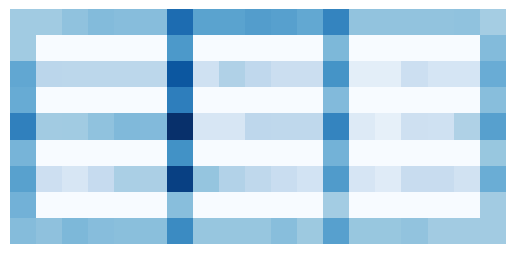

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([
    [346., 346., 387., 418., 411., 411., 729., 523., 523., 545., 532., 498., 641., 384., 384., 384., 384., 388., 338.],
    [346., 0., 0., 0., 0., 0., 562., 0., 0., 0., 0., 0., 433., 0., 0., 0., 0., 0., 417.],
    [503., 268., 265., 265., 265., 265., 809., 193., 302., 255., 211., 211., 584., 95., 95., 207., 160., 160., 482.],
    [485., 0., 0., 0., 0., 0., 663., 0., 0., 0., 0., 0., 420., 0., 0., 0., 0., 0., 408.],
    [657., 344., 346., 388., 426., 423., 951., 152., 152., 263., 260., 260., 642., 120., 79., 194., 191., 308., 534.],
    [449., 0., 0., 0., 0., 0., 591., 0., 0., 0., 0., 0., 456., 0., 0., 0., 0., 0., 371.],
    [531., 203., 151., 237., 321., 318., 888., 376., 296., 257., 220., 178., 551., 157., 112., 225., 225., 182., 478.],
    [460., 0., 0., 0., 0., 0., 408., 0., 0., 0., 0., 0., 340., 0., 0., 0., 0., 0., 345.],
    [413., 392., 433., 409., 402., 402., 617., 374., 374., 374., 407., 359., 534., 369., 369., 384., 345., 345., 345.]
])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
plt.axis('off')
plt.show()


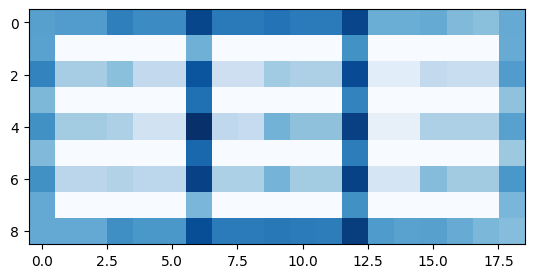

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([
    [3846, 3952, 3952, 4755, 4447, 4447, 6271, 4906, 4906, 5085, 4867, 4867,6301, 3454, 3454, 3553, 3061, 2887, 3514],
    [3797,    0,    0,    0,    0,    0, 3358,    0,    0,    0,    0,    0,4281,    0,    0,    0,    0,    0, 3504],
    [4652, 2400, 2400, 2886, 1793, 1793, 5877, 1456, 1456, 2512, 2228, 2228,6119,  742,  742, 1771, 1607, 1607, 3949],
    [3111,    0,    0,    0,    0,    0, 5151,    0,    0,    0,    0,    0,4653,    0,    0,    0,    0,    0, 2791],
    [4317, 2453, 2453, 2228, 1328, 1328, 6865, 1850, 1699, 3296, 2817, 2817,6416,  540,  540, 2244, 2234, 2234, 3811],
    [3070,    0,    0,    0,    0,    0, 5401,    0,    0,    0,    0,    0,4822,    0,    0,    0,    0,    0, 2597],
    [4292, 1946, 1946, 2149, 1928, 1928, 6390, 2274, 2274, 3269, 2448, 2448,6373, 1179, 1179, 2989, 2470, 2470, 4127],
    [3568,    0,    0,    0,    0,    0, 3177,    0,    0,    0,    0,    0,4297,    0,    0,    0,    0,    0, 3190],
    [3568, 3568, 3568, 4367, 4108, 4108, 6081, 4877, 4877, 4935, 4869, 4813,6512, 4018, 3782, 3847, 3502, 3146, 2968]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()



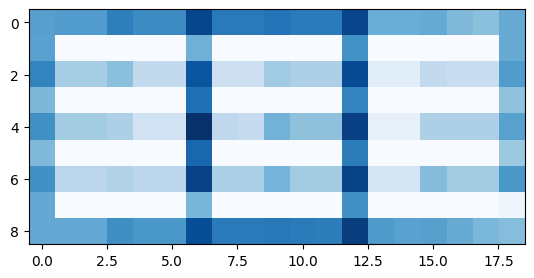

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 1 0 0
now_count = np.array([[3846, 3952, 3952, 4755, 4447, 4447, 6271, 4906, 4906, 5085, 4867, 4867,
  6301, 3454, 3454, 3553, 3061, 2887, 3514],
 [3797,    0,    0,    0,    0,    0, 3358,    0,    0,    0,    0,    0,
  4281,    0,    0,    0,    0,    0, 3504],
 [4652, 2400, 2400, 2886, 1793, 1793, 5877, 1456, 1456, 2512, 2228, 2228,
  6119,  742,  742, 1771, 1607, 1607, 3949],
 [3111,    0,    0,    0,    0,    0, 5151,    0,    0,    0,    0,    0,
  4653,    0,    0,    0,    0,    0, 2791],
 [4317, 2453, 2453, 2228, 1328, 1328, 6865, 1850, 1699, 3296, 2817, 2817,
  6416,  540,  540, 2244, 2234, 2234, 3811],
 [3070,    0,    0,    0,    0,    0, 5401,    0,    0,    0,    0,    0,
  4822,    0,    0,    0,    0,    0, 2597],
 [4292, 1946, 1946, 2149, 1928, 1928, 6390, 2274, 2274, 3269, 2448, 2448,
  6373, 1179, 1179, 2989, 2470, 2470, 4127],
 [3568,    0,    0,    0,    0,    0, 3177,    0,    0,    0,    0,    0,
  4297,    0,    0,    0,    0,    0, 319],
 [3568, 3568, 3568, 4367, 4108, 4108, 6081, 4877, 4877, 4935, 4869, 4813,
  6512, 4018, 3782, 3847, 3502, 3146, 2968]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()



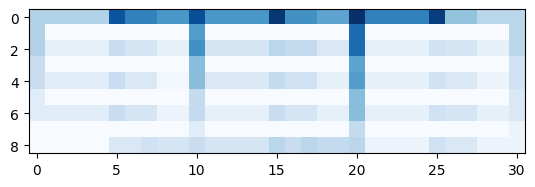

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 0 0 100
now_count = np.array([
    [11, 11, 11, 11, 11, 30, 24, 24, 21, 21, 31, 21, 21, 21, 21, 34, 22, 22, 19, 19, 35, 24, 24, 24, 24, 33, 14, 14, 10, 10, 10],
    [11,  0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0, 0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0, 0,  0, 10],
    [11,  3,  3,  3,  3,  8,  6,  6,  3,  3, 22,  6,  6,  6, 6, 10,  9,  9,  5,  5, 27,  3,  3,  3,  3,  7,  6,  6, 3,  3, 10],
    [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0, 0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0, 0,  0,  7],
    [ 8,  4,  4,  4,  4,  8,  5,  5,  1,  1, 15,  5,  5,  5, 5,  9,  7,  7,  3,  3, 20,  3,  3,  3,  3,  7,  5,  5, 2,  2,  7],
    [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0, 0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0, 0,  0,  5],
    [ 4,  4,  4,  4,  4,  8,  6,  6,  2,  2,  9,  3,  3,  3, 3,  8,  6,  6,  3,  3, 15,  3,  3,  3,  3,  7,  6,  6, 3,  3,  5],
    [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0, 0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0, 0,  0,  2],
    [ 0,  0,  0,  0,  0,  5,  5,  7,  6,  6,  8,  6,  6,  6, 6, 10,  8, 10,  9,  9, 10,  2,  2,  2,  2,  7,  5,  5, 2,  2,  2]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()


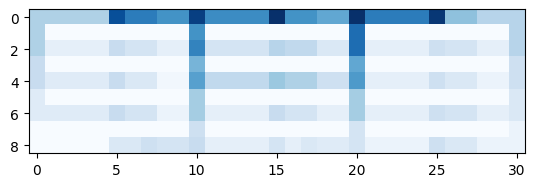

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 20 70 10
now_count = np.array(
    [[11, 11, 11, 11, 11, 30, 24, 24, 21, 21, 32, 22, 22, 22,22, 34, 21, 21, 18, 18, 34, 24, 24, 24, 24, 33, 14, 14,10, 10, 10],
      [11,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0, 0,  0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,0,  0, 10],
      [11,  3,  3,  3,  3,  8,  6,  6,  3,  3, 23,  6,  6,  6, 6, 10,  9,  9,  5,  5, 26,  3,  3,  3,  3,  7,  6,  6,3,  3, 10],
      [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0,  0, 0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0,  0,  0,  0,0,  0,  7],
      [ 8,  4,  4,  4,  4,  8,  5,  5,  1,  1, 19,  9,  9,  9, 9, 13, 11, 11,  7,  7, 20,  3,  3,  3,  3,  7,  5,  5,2,  2,  7],
      [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0, 12,  0,  0,  0, 0,  0,  0,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,0,  0,  5],
      [ 4,  4,  4,  4,  4,  8,  6,  6,  2,  2, 12,  3,  3,  3, 3,  8,  6,  6,  3,  3, 12,  3,  3,  3,  3,  7,  6,  6,3,  3,  5],
      [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0, 0,  0,  0,  0,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0,0,  0,  2],
      [ 0,  0,  0,  0,  0,  5,  5,  7,  6,  6,  8,  3,  3,  3, 3,  6,  3,  5,  4,  4,  6,  2,  2,  2,  2,  7,  5,  5,2,  2,  2]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()

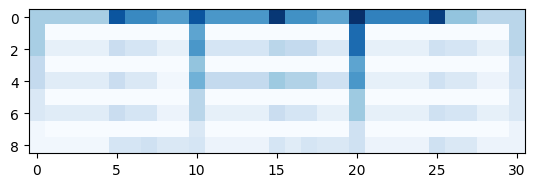

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 0 90 10
now_count = np.array(
    [[12, 12, 12, 12, 12, 30, 23, 23, 20, 20, 30, 21, 21, 21,
  21, 34, 22, 22, 19, 19, 35, 24, 24, 24, 24, 33, 14, 14,
  10, 10, 10],
 [12,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,
   0,  0,  0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,
   0,  0, 10],
 [12,  3,  3,  3,  3,  8,  6,  6,  3,  3, 21,  6,  6,  6,
   6, 10,  9,  9,  5,  5, 27,  3,  3,  3,  3,  7,  6,  6,
   3,  3, 10],
 [ 9,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,
   0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  7],
 [ 9,  4,  4,  4,  4,  8,  5,  5,  1,  1, 17,  9,  9,  9,
   9, 13, 11, 11,  7,  7, 21,  3,  3,  3,  3,  7,  5,  5,
   2,  2,  7],
 [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0,
   0,  0,  0,  0,  0,  0, 13,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  5],
 [ 5,  4,  4,  4,  4,  8,  6,  6,  2,  2, 10,  3,  3,  3,
   3,  8,  6,  6,  3,  3, 13,  3,  3,  3,  3,  7,  6,  6,
   3,  3,  5],
 [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,
   0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,
   0,  0,  2],
 [ 1,  1,  1,  1,  1,  6,  6,  7,  5,  5,  6,  2,  2,  2,
   2,  6,  4,  6,  5,  5,  7,  2,  2,  2,  2,  7,  5,  5,
   2,  2,  2]])

plt.imshow(now_count, cmap='Blues', interpolation='nearest')
# plt.colorbar(label='Count')
# plt.xlabel('Column')
# plt.ylabel('Row')
plt.show()



c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\envs\hyeooi\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.

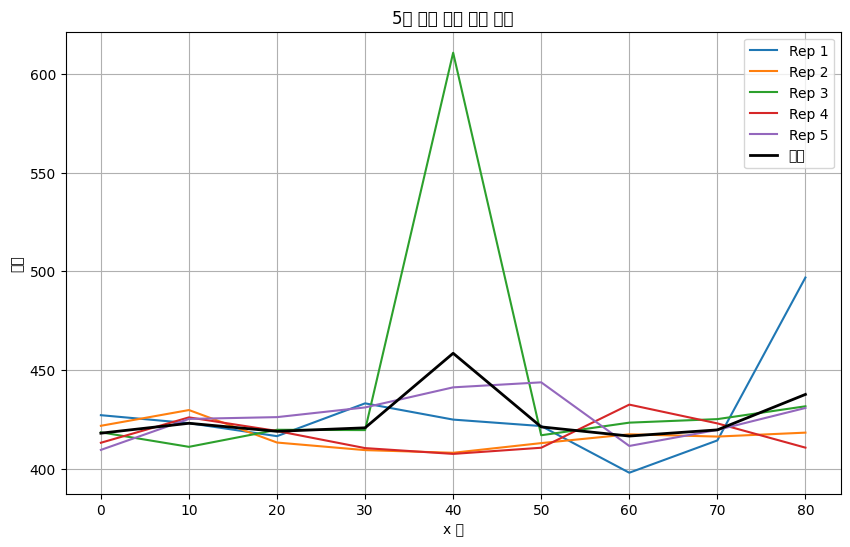

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 주어진 데이터 (5회의 반복)
data = np.array([
    [427.168, 423.136, 416.552, 433.16, 424.936, 421.664, 398.04, 414.392, 496.864],
    [421.8, 429.768, 413.32, 409.48, 408.136, 413.032, 417.496, 416.344, 418.336],
    [418.496, 411.144, 419.784, 419.616, 610.672, 417.008, 423.392, 425.176, 431.672],
    [413.216, 426.056, 419.176, 410.504, 407.568, 410.688, 432.52, 423.016, 410.736],
    [409.592, 425.28, 426.184, 431.096, 441.264, 443.8, 411.592, 419.72, 430.816]
])

# 각 열의 평균 계산
avg_data = np.mean(data, axis=0)

# x축 데이터 (0부터 80까지 10단위)
x = np.arange(0, 81, 10)

# 그래프 그리기
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(x, data[i], label=f'Rep {i + 1}')

# 평균 그래프 그리기
plt.plot(x, avg_data, label='평균', color='black', linewidth=2)

# 그래프 제목 및 레이블 설정
plt.title('5회 반복 시간 측정 결과')
plt.xlabel('x 값')
plt.ylabel('시간')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()


Processing subdirectory: 10_10
Processing subdirectory: 10_15
Processing subdirectory: 15_15
Processing subdirectory: 15_20
Processing subdirectory: 20_20
Processing subdirectory: 20_25
Processing subdirectory: 25_25
Processing subdirectory: 25_30
Processing subdirectory: 30_30
Processing subdirectory: 5_10
Processing subdirectory: 5_5


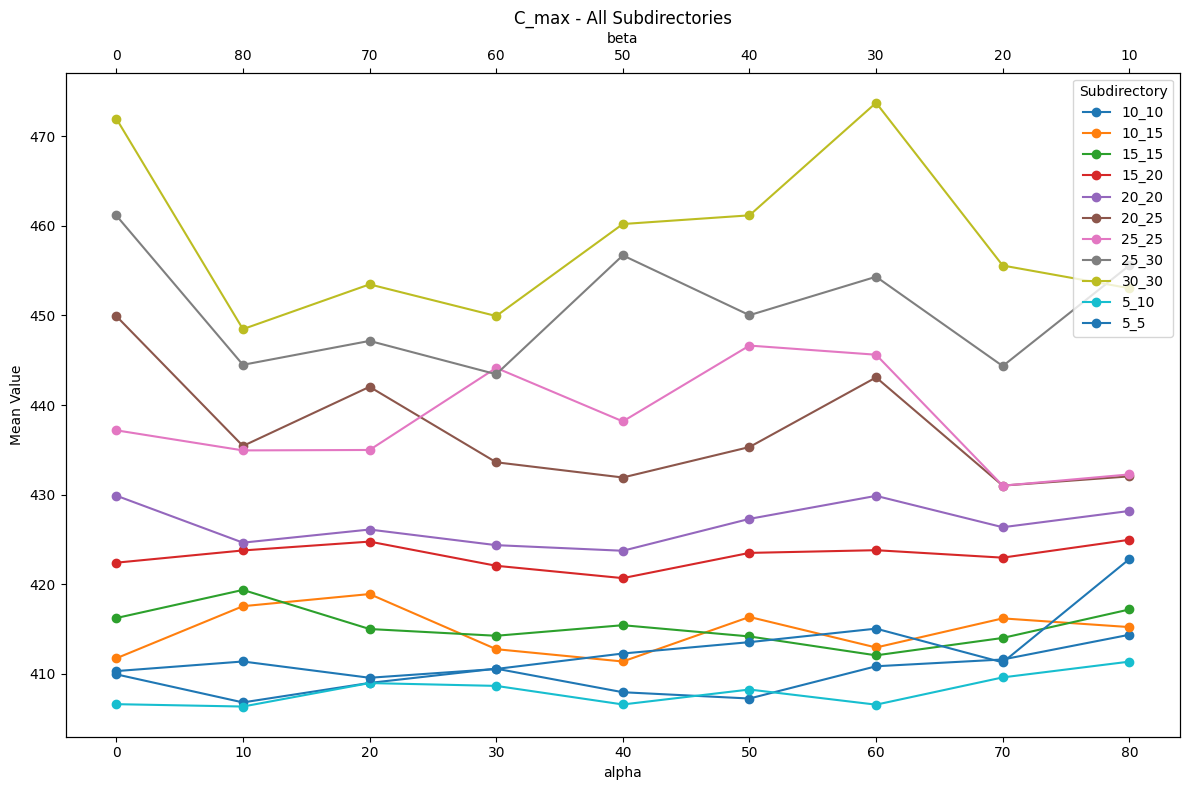

In [60]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to your folder containing CSV files
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'

weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'C_max'

# Initialize the legend labels
legend_labels = []

# Initialize the data dictionary for each subdirectory
data_dict = {}

# Iterate over subdirectories
for sub in os.listdir(os.path.join(initial_path, casename)):
    # Check if the item is a directory
    sub_path = os.path.join(initial_path, casename, sub)
    if os.path.isdir(sub_path):
        print(f"Processing subdirectory: {sub}")

        folder_path = sub_path

        blank_df = {}

        for _ in range(len(weights[0])):
            weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
            blank_df[weight_case] = []

        # blank_df's keys and folder_path's files
        for key in blank_df.keys():
            for file in os.listdir(folder_path):
                if file.endswith('.csv') and key in file:
                    df = pd.read_csv(os.path.join(folder_path, file))
                    blank_df[key].append(df[indicator].iloc[0])

        # Function to remove outliers using IQR
        def remove_outliers(data):
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return [x for x in data if lower_bound <= x <= upper_bound]

        # Remove outliers from each list in blank_df
        for key, value in blank_df.items():
            blank_df[key] = remove_outliers(value)

        # Store the data for the current subdirectory
        data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

# Plotting all the graphs on a single plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Iterate over each subdirectory's data and plot
for sub, data in data_dict.items():
    ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

ax1.set_xlabel('alpha')
ax1.set_ylabel('Mean Value')
ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

# Creating a second x-axis on top
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(ax1.get_xticks())
ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
ax2.set_xlabel('beta')

# Adding legend
ax1.legend(title='Subdirectory')

# Display the plot
plt.title(f'C_max - All Subdirectories')
plt.tight_layout()
plt.show()


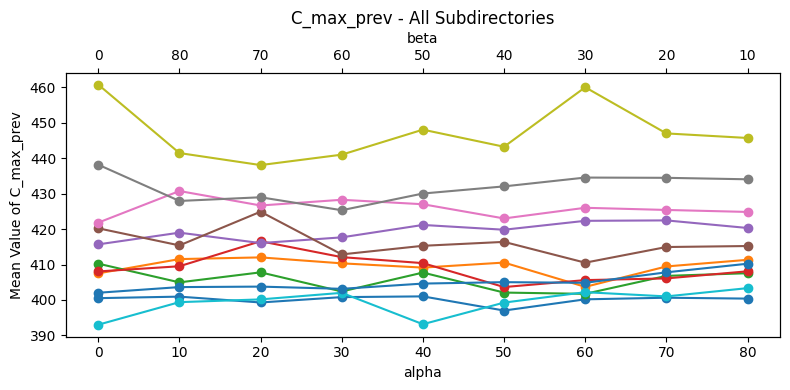

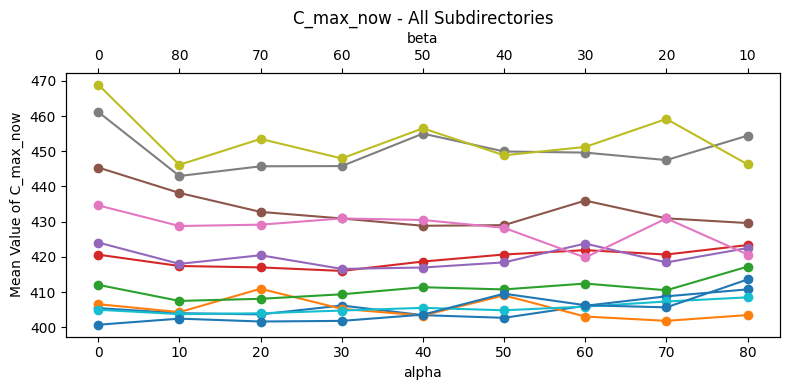

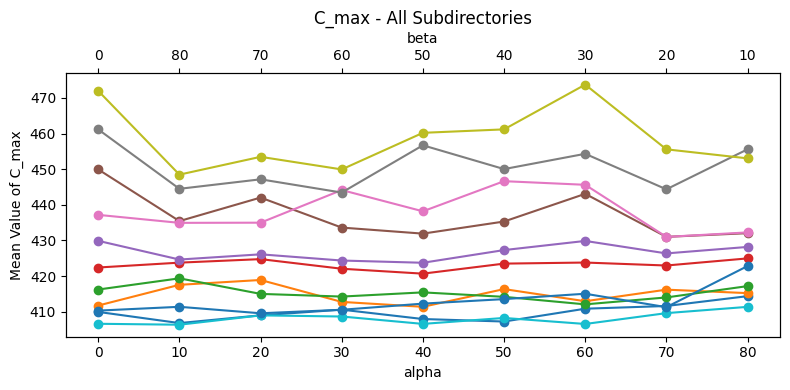

In [80]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    # ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'C_max_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'C_max_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'C_max'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


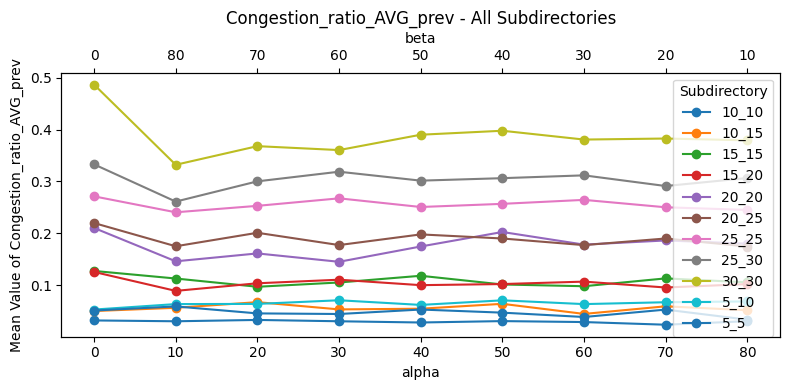

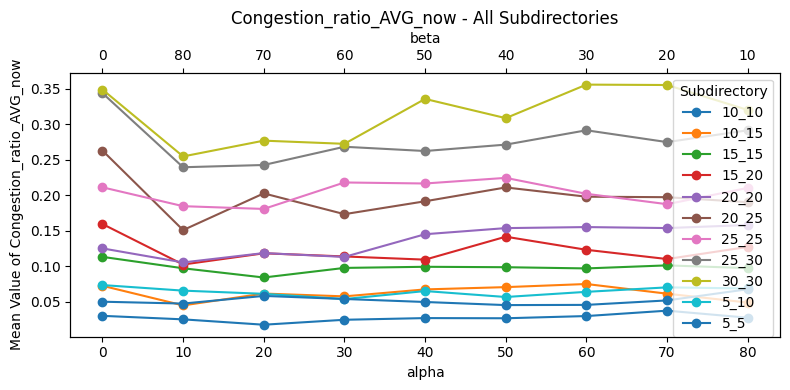

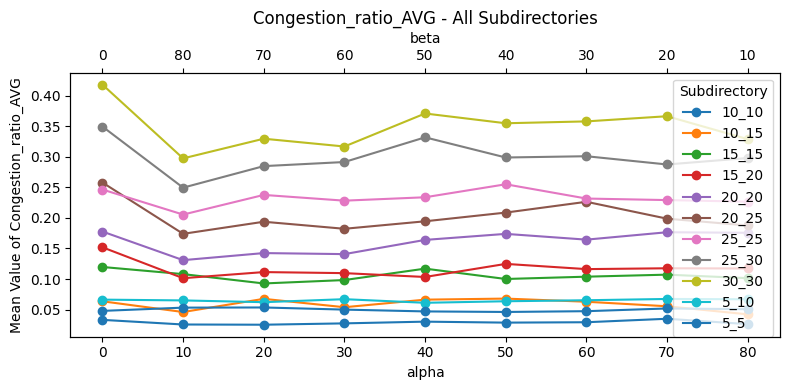

In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicator):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            blank_df = {}

            for _ in range(len(weights[0])):
                weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                blank_df[weight_case] = []

            # blank_df's keys and folder_path's files
            for key in blank_df.keys():
                for file in os.listdir(folder_path):
                    if file.endswith('.csv') and key in file:
                        df = pd.read_csv(os.path.join(folder_path, file))
                        blank_df[key].append(df[indicator].iloc[0])

            # Function to remove outliers using IQR
            def remove_outliers(data):
                Q1 = np.percentile(data, 25)
                Q3 = np.percentile(data, 75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                return [x for x in data if lower_bound <= x <= upper_bound]

            # Remove outliers from each list in blank_df
            for key, value in blank_df.items():
                blank_df[key] = remove_outliers(value)

            # Store the data for the current subdirectory
            data_dict[sub] = {key: np.mean(value) for key, value in blank_df.items()}

    return data_dict

def plot_subdirectories(data_dict, weights, indicator):
    # Plotting all the graphs on a single plot
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Iterate over each subdirectory's data and plot
    for sub, data in data_dict.items():
        ax1.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

    ax1.set_xlabel('alpha')
    ax1.set_ylabel(f'Mean Value of {indicator}')
    ax1.set_xticks(range(len(data_dict[list(data_dict.keys())[0]])))
    ax1.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

    # Creating a second x-axis on top
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(ax1.get_xticks())
    ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
    ax2.set_xlabel('beta')

    # Adding legend
    ax1.legend(title='Subdirectory')

    # Display the plot
    plt.title(f'{indicator} - All Subdirectories')
    plt.tight_layout()
    plt.show()


initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]

indicator = 'Congestion_ratio_AVG_prev'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG_now'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


indicator = 'Congestion_ratio_AVG'
data_dict = process_subdirectories(initial_path, casename, weights, indicator)
plot_subdirectories(data_dict, weights, indicator)


Processing subdirectory: 10_10
Processing subdirectory: 10_15
Processing subdirectory: 15_15
Processing subdirectory: 15_20
Processing subdirectory: 20_20
Processing subdirectory: 20_25
Processing subdirectory: 25_25
Processing subdirectory: 25_30
Processing subdirectory: 30_30
Processing subdirectory: 5_10
Processing subdirectory: 5_5


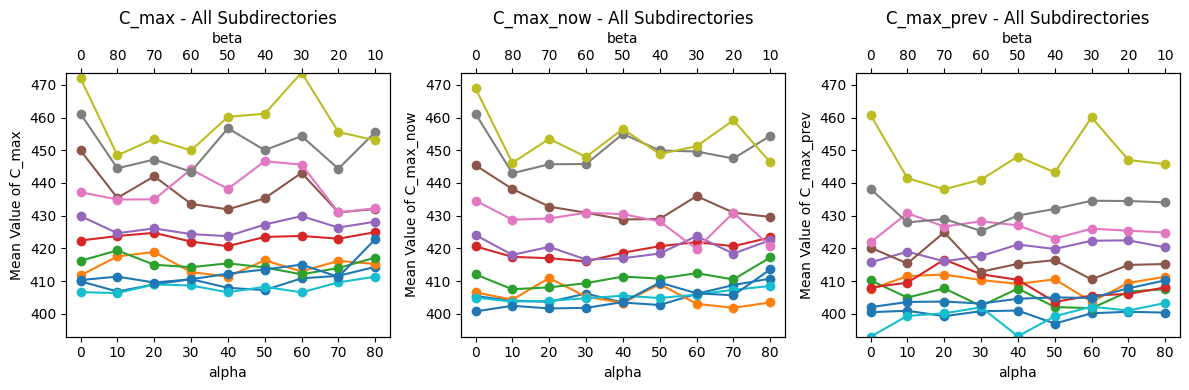

In [92]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {indicator: {} for indicator in indicators}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current subdirectory and indicator
                data_dict[indicator][sub] = {key: np.mean(value) for key, value in blank_df.items()}

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Determine the number of subplots
    num_subplots = len(indicators)

    # Find global y-axis limits
    global_min = min([np.min(list(data.values())) for indicator_data in data_dict.values() for data in indicator_data.values()])
    global_max = max([np.max(list(data.values())) for indicator_data in data_dict.values() for data in indicator_data.values()])

    # Plotting all the graphs in a horizontal layout
    fig, axes = plt.subplots(1, num_subplots, figsize=(12, 4))  # Adjust the figure size here

    for i, indicator in enumerate(indicators):
        ax = axes[i]
        ax.set_title(f'{indicator} - All Subdirectories')

        # Iterate over each subdirectory's data and plot
        for sub, data in data_dict[indicator].items():
            ax.plot(list(data.keys()), list(data.values()), marker='o', linestyle='-', label=sub)

        ax.set_xlabel('alpha')
        ax.set_ylabel(f'Mean Value of {indicator}')
        ax.set_xticks(range(len(data_dict[indicator][list(data_dict[indicator].keys())[0]])))
        ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

        # Creating a second x-axis on top
        ax2 = ax.twiny()
        ax2.set_xlim(ax.get_xlim())
        ax2.set_xticks(ax.get_xticks())
        ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
        ax2.set_xlabel('beta')

        # Set y-axis limits consistently
        ax.set_ylim(global_min, global_max)

        # Adding legend
        # ax.legend(title='Subdirectory')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max', 'C_max_now', 'C_max_prev']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)


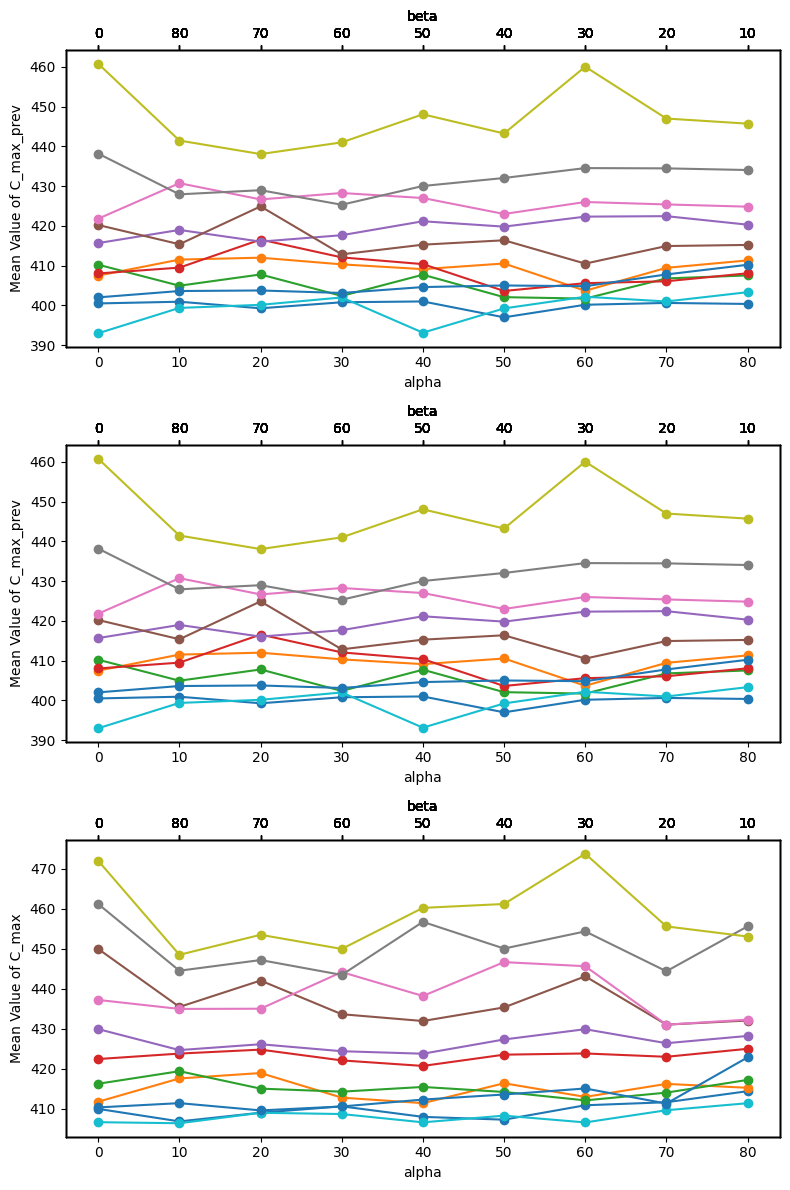

In [82]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_subdirectories(initial_path, casename, weights, indicators):
    # Initialize the legend labels
    legend_labels = []

    # Initialize the data dictionary for each subdirectory
    data_dict = {}

    # Iterate over subdirectories
    for sub in os.listdir(os.path.join(initial_path, casename)):
        # Check if the item is a directory
        sub_path = os.path.join(initial_path, casename, sub)
        if os.path.isdir(sub_path):
            # print(f"Processing subdirectory: {sub}")

            folder_path = sub_path

            sub_data = {}

            for indicator in indicators:
                blank_df = {}

                for _ in range(len(weights[0])):
                    weight_case = str(weights[0][_]) + '_' + str(weights[1][_]) + '_' + str(weights[2][_])
                    blank_df[weight_case] = []

                # blank_df's keys and folder_path's files
                for key in blank_df.keys():
                    for file in os.listdir(folder_path):
                        if file.endswith('.csv') and key in file:
                            df = pd.read_csv(os.path.join(folder_path, file))
                            blank_df[key].append(df[indicator].iloc[0])

                # Function to remove outliers using IQR
                def remove_outliers(data):
                    Q1 = np.percentile(data, 25)
                    Q3 = np.percentile(data, 75)
                    IQR = Q3 - Q1
                    lower_bound = Q1 - 1.5 * IQR
                    upper_bound = Q3 + 1.5 * IQR
                    return [x for x in data if lower_bound <= x <= upper_bound]

                # Remove outliers from each list in blank_df
                for key, value in blank_df.items():
                    blank_df[key] = remove_outliers(value)

                # Store the data for the current indicator
                sub_data[indicator] = {key: np.mean(value) for key, value in blank_df.items()}

            # Store subdirectory data
            data_dict[sub] = sub_data

    return data_dict

def plot_subdirectories(data_dict, weights, indicators):
    # Create subplots with the number of rows as the number of indicators
    fig, axs = plt.subplots(len(indicators), 1, figsize=(8, 4 * len(indicators)))

    # Iterate over each subdirectory's data
    for sub, sub_data in data_dict.items():
        # Iterate over each indicator
        for i, indicator in enumerate(indicators):
            ax = axs[i] if len(indicators) > 1 else axs  # Handle single indicator case

            # Plot data for the current subdirectory and indicator
            ax.plot(list(sub_data[indicator].keys()), list(sub_data[indicator].values()), marker='o', linestyle='-', label=sub)

            ax.set_xlabel('alpha')
            ax.set_ylabel(f'Mean Value of {indicator}')
            ax.set_xticks(range(len(sub_data[indicator])))
            ax.set_xticklabels([f'{w[0]}' for w in zip(weights[0], weights[1])])

            # Creating a second x-axis on top
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(ax.get_xticks())
            ax2.set_xticklabels([f'{w[1]}' for w in zip(weights[0], weights[1])])
            ax2.set_xlabel('beta')

            # Adding legend
            # ax.legend(title='Subdirectory')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Example usage
initial_path = 'C:\\Users\\USER\\workspace\\TSB\\Simulation\\Assets\\Results'
casename = 'Completiontime_Congestionratio'
weights = [[0, 10, 20, 30, 40, 50, 60, 70, 80],
           [0, 80, 70, 60, 50, 40, 30, 20, 10],
           [100, 10, 10, 10, 10, 10, 10, 10, 10]]
indicators = ['C_max_prev', 'C_max_prev', 'C_max']  # Add more indicators as needed

# Process subdirectories
data_dict = process_subdirectories(initial_path, casename, weights, indicators)

# Plot subdirectories
plot_subdirectories(data_dict, weights, indicators)
